# Transient Universe: Nested Sampling

### WIP Unfinished!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dynesty
import scipy.stats as stats
import corner

#Nice figures
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12

In [2]:
data = np.load('../solutions/transient.npy')

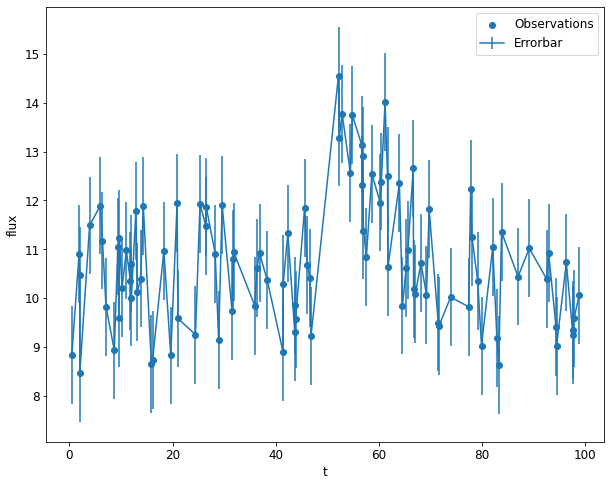

In [3]:
#Unpacking and visualizing data
#t = data[:, 0]
#flux = data[:, 1]
#flux_err = data[:, 2]

#Way faster unpacking!!
t, flux, flux_err = data.T

#Plotting with errors
plt.scatter(t, flux, label='Observations')
plt.errorbar(t, flux, yerr=flux_err, label='Errorbar')
plt.xlabel('t')
plt.ylabel('flux')
plt.legend()
plt.show()

In [4]:
#Function modeling Signal: Noise + Exponential decay
def burst_model(parameters, t):

    b, t_0, A, alpha = parameters.T

    return np.where(t<t_0, b, b + A * np.exp(-alpha * (t - t_0)))

#Function modeling Signal: Gaussian
def gauss_model(parameters, t):

    b, t_0, A, sigma = parameters.T

    return b + A * np.exp(((t - t_0) ** 2)/(2 * sigma ** 2))

In [5]:
def loglike(theta, data, model):
    t, flux, flux_err = data.T

    #Computing theoretical flux
    flux_th = model(theta, t)
    
    #Gaussian Log-Likelihood -> Distance from theoretical value
    logL = -0.5 * np.sum(((flux - flux_th)**2 / (flux_err)**2))

    return logL


def logprior(theta, model):
    #Priors initialization
    t0min, t0max = 0, 100
    Amin, Amax = 0, 50
    bmin, bmax = 0, 50
    alphamin, alphamax = np.exp(-5), np.exp(5)
    sigmamin, sigmamax = np.exp(-2), np.exp(2)


    if model == 'burst_model':
        A, b, t0, alpha = theta

    elif model == 'gauss_model':
        A, b, t0, sigma = theta

SyntaxError: invalid syntax (2575537492.py, line 13)

In [16]:
ndim = 4

In [6]:
#Burst
sampler = dynesty.NestedSampler(loglikelihood(theta, data, model=burst_model), ptform, ndim)


NameError: name 'loglike' is not defined

In [ ]:

sampler.run_nested()


In [ ]:
sresults = sampler.results

